<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5; padding: 15px 5px; " >
<p>Use this notebook to follow along with the lab tutorial.</p>
</div>

# Lesson 2

Some keyboard shortcuts:  
SHIFT + ENTER > run cell and jump to next one  
CTRL + ENTER > run cell and stay on same cell  
A / B > create cell above / below  
SHIFT + M > join many cells into one  
CTRL + SHIFT + - > split cell into two (based on where cursor is)  
D + D > delete a cell

Some useful magics:  
%%writefile file  
%run file  
%run -i file  
%load file  

In [1]:
%%writefile script.py
print(bla)

Overwriting script.py


In [2]:
%run script.py

NameError: name 'bla' is not defined

In [3]:
bla = "foo"
bla += bla

In [4]:
bla

'foofoo'

In [5]:
%run -i script.py

foofoo


In [6]:
# %load script.py
print(bla)


foofoo


In [7]:
import numpy as np
from sklearn import metrics

## Dealing with Class Imbalance
### SMOTE: Synthetic Minority Oversampling Technique

#### Alert:
1. Can be slow when data is large
2. Can work on binary or multiclass classification data 

### Imbalanced Learn Library
See <a href="http://contrib.scikit-learn.org/imbalanced-learn/stable/">Imbalanced-Learn documentation</a>

In [8]:
import imblearn

In [10]:
from collections import Counter
from sklearn.datasets import make_classification
?make_classification

In [11]:
from imblearn.over_sampling import SMOTE 
sample_size = 1000
X, y = make_classification(n_classes=3, class_sep=2, weights=[0.05, 0.1, 0.85], n_informative=3, \
                           n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=sample_size, random_state=10)
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({2: 850, 1: 100, 0: 50})


In [15]:
import numpy as np
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([ 50, 100, 850], dtype=int64))

In [16]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({2: 850, 1: 850, 0: 850})


In [17]:
np.unique(y_res, return_counts=True)

(array([0, 1, 2]), array([850, 850, 850], dtype=int64))

In [19]:
from sklearn.datasets import load_boston
boston = load_boston()

In [21]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [29]:
import pandas as pd
df_boston = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

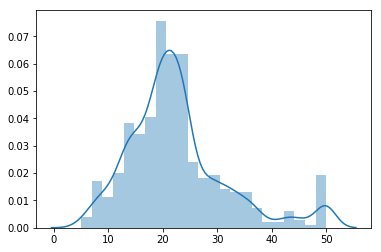

In [32]:
import seaborn as sns
sns.distplot(boston['target'])

In [35]:
y_binary = boston['target'] >= 40

EXERCISE: Find counts for `y_binary`.

In [36]:
np.unique(y_binary, return_counts=True)

(array([False,  True]), array([475,  31], dtype=int64))

In [39]:
df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

EXERCISE: Train a logistic regression classifier to predict when the price of a house is above 40k.

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_boston, y_binary, test_size=0.20, random_state=0)

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\sethmott\AppData\Local\Continuum\anaconda3\envs\uwdatasci420\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
predictions = lr.predict(x_test)

In [81]:
lr.predict_proba(x_test)

array([[9.99882686e-01, 1.17314408e-04],
       [9.99222792e-01, 7.77207879e-04],
       [9.99972962e-01, 2.70383851e-05],
       [9.99999997e-01, 2.56652297e-09],
       [9.99999963e-01, 3.72466081e-08],
       [9.99998563e-01, 1.43745559e-06],
       [9.99988365e-01, 1.16350437e-05],
       [9.99999118e-01, 8.81660610e-07],
       [9.99999954e-01, 4.62512609e-08],
       [1.00000000e+00, 4.70388822e-13],
       [1.00000000e+00, 1.71065119e-13],
       [1.00000000e+00, 5.57762159e-17],
       [1.00000000e+00, 1.87036714e-10],
       [1.00000000e+00, 5.90622777e-15],
       [1.15722617e-03, 9.98842774e-01],
       [9.89866781e-01, 1.01332195e-02],
       [9.99952251e-01, 4.77490419e-05],
       [6.28227764e-01, 3.71772236e-01],
       [9.01236149e-01, 9.87638507e-02],
       [9.99985250e-01, 1.47502349e-05],
       [9.99913847e-01, 8.61534046e-05],
       [9.99993806e-01, 6.19369033e-06],
       [9.99999996e-01, 3.98134002e-09],
       [9.98273926e-01, 1.72607416e-03],
       [9.999986

In [57]:
np.unique(predictions, return_counts=True)

(array([False,  True]), array([99,  3], dtype=int64))

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)

0.9607843137254902

EXERCISE: Find some more useful evaluation metrics (defend your choice) and report them. Scenario: you're a developer and want to predict house prices. You prefer to bid low and lose a bid than bid high for a house that's not worth it.

In [84]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[92  3]
 [ 4  3]]


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98        95
        True       1.00      0.43      0.60         7

   micro avg       0.96      0.96      0.96       102
   macro avg       0.98      0.71      0.79       102
weighted avg       0.96      0.96      0.95       102



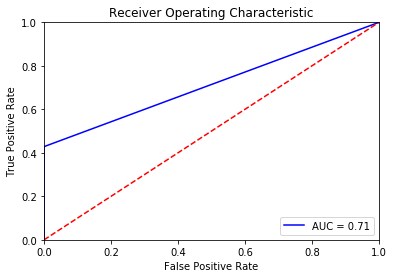

In [68]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
from sklearn.linear_model import LogisticRegressionCV
clr = LogisticRegressionCV(cv=5, random_state=0, max_iter=5000)
clr.fit(x_train, y_train)

C:\Users\sethmott\AppData\Local\Continuum\anaconda3\envs\uwdatasci420\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\sethmott\AppData\Local\Continuum\anaconda3\envs\uwdatasci420\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=5000,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [74]:
predictions = clr.predict(x_test)

In [76]:
np.unique(predictions, return_counts=True)

(array([False,  True]), array([96,  6], dtype=int64))

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)

0.9313725490196079

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.96      0.97      0.96        95
        True       0.50      0.43      0.46         7

   micro avg       0.93      0.93      0.93       102
   macro avg       0.73      0.70      0.71       102
weighted avg       0.93      0.93      0.93       102



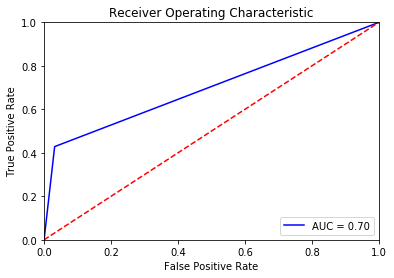

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[92  3]
 [ 4  3]]
